<a href="https://colab.research.google.com/github/amalpanwar/ElginFC/blob/main/RadarPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd



In [ ]:
df = pd.read_excel("/content/CM_Elgin.xlsx")

In [ ]:
df.tail()

,Player,Team,Contract Expiry \n(Trnsfmkt),Attribute,Value
195,League Two Average,NaN,NaN,Key passes per 90,0.216129
196,League Two Average,NaN,NaN,Passes to final third per 90,7.099677
197,League Two Average,NaN,NaN,"Accurate passes to final third, %",56.386452
198,League Two Average,NaN,NaN,Progressive passes per 90,6.919355
199,League Two Average,NaN,NaN,"Accurate progressive passes, %",68.747419


In [ ]:
pivot_df = df.pivot(index='Player', columns='Attribute', values='Value')

In [ ]:
pivot_df.shape

(10, 20)

In [ ]:
pivot_df.head()

Attribute,"Accurate forward passes, %","Accurate passes to final third, %","Accurate passes, %","Accurate progressive passes, %",Aerial duels per 90,"Aerial duels won, %",Age,Assists,Forward passes per 90,Fouls per 90,Interceptions per 90,Key passes per 90,Matches played,Minutes played,Passes per 90,Passes to final third per 90,Progressive passes per 90,Recieved Passes P/90,Shots per 90,Successful defensive actions per 90
Player,,,,,,,,,,,,,,,,,,,,
Brian Cameron,63.95,58.64,79.14,69.68,4.46,50.35,32.0,0.0,12.64,1.16,4.96,0.16,33.0,3063.0,36.37,5.96,5.87,16.73,0.69,8.71
CM 1,62.79,64.15,79.68,67.21,2.47,15.00,19.0,0.0,10.60,2.22,4.68,0.49,10.0,730.0,38.22,6.53,7.52,27.37,1.73,10.60
CM 2,55.36,55.07,69.99,75.27,6.58,54.98,22.0,1.0,17.45,1.90,6.30,0.12,31.0,2888.0,35.93,10.75,8.82,14.80,0.65,13.49
CM 3,63.14,47.51,75.38,73.65,3.62,33.70,28.0,3.0,15.28,1.61,2.95,0.20,31.0,2374.0,38.86,7.13,6.57,25.59,1.93,7.99
CM 4,65.30,65.16,81.08,68.59,4.55,32.43,22.0,3.0,11.25,1.60,3.14,0.15,35.0,2927.0,39.97,4.77,5.87,23.58,0.83,7.90


In [ ]:
def scale_column(col):
    return (col - col.min()) / (col.max() - col.min())

# Scale each column
scaled_df = pivot_df.apply(scale_column)


In [ ]:
categories = list(scaled_df.columns)
num_vars = len(categories)

In [ ]:
num_vars

20

In [ ]:
# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

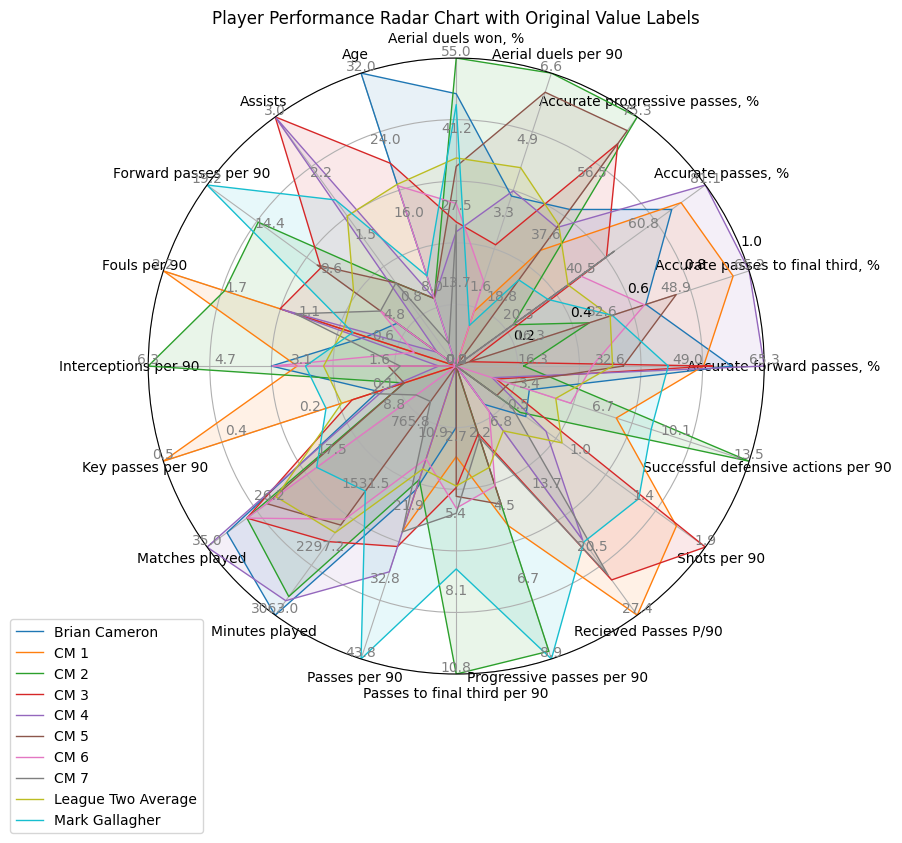

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each player
for index, row in scaled_df.iterrows():
    values = row.tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)
    ax.fill(angles, values, alpha=0.1)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add custom y-axis labels
for i, category in enumerate(categories):
    angle_rad = angles[i]
    # Determine the maximum original value for the category
    max_val = pivot_df[category].max()
    # Add custom labels
    for label in [0.0, 0.25, 0.5, 0.75, 1.0]:
        label_angle = angle_rad - (pi / num_vars)  # Adjust label angle for readability
        ax.text(angle_rad, label, f"{label * max_val:.1f}", ha='center', va='bottom', fontsize=10, color='gray')

# Set y-limits
ax.set_ylim(0, 1)

# Title and legend
plt.title('Player Performance Radar Chart with Original Value Labels')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

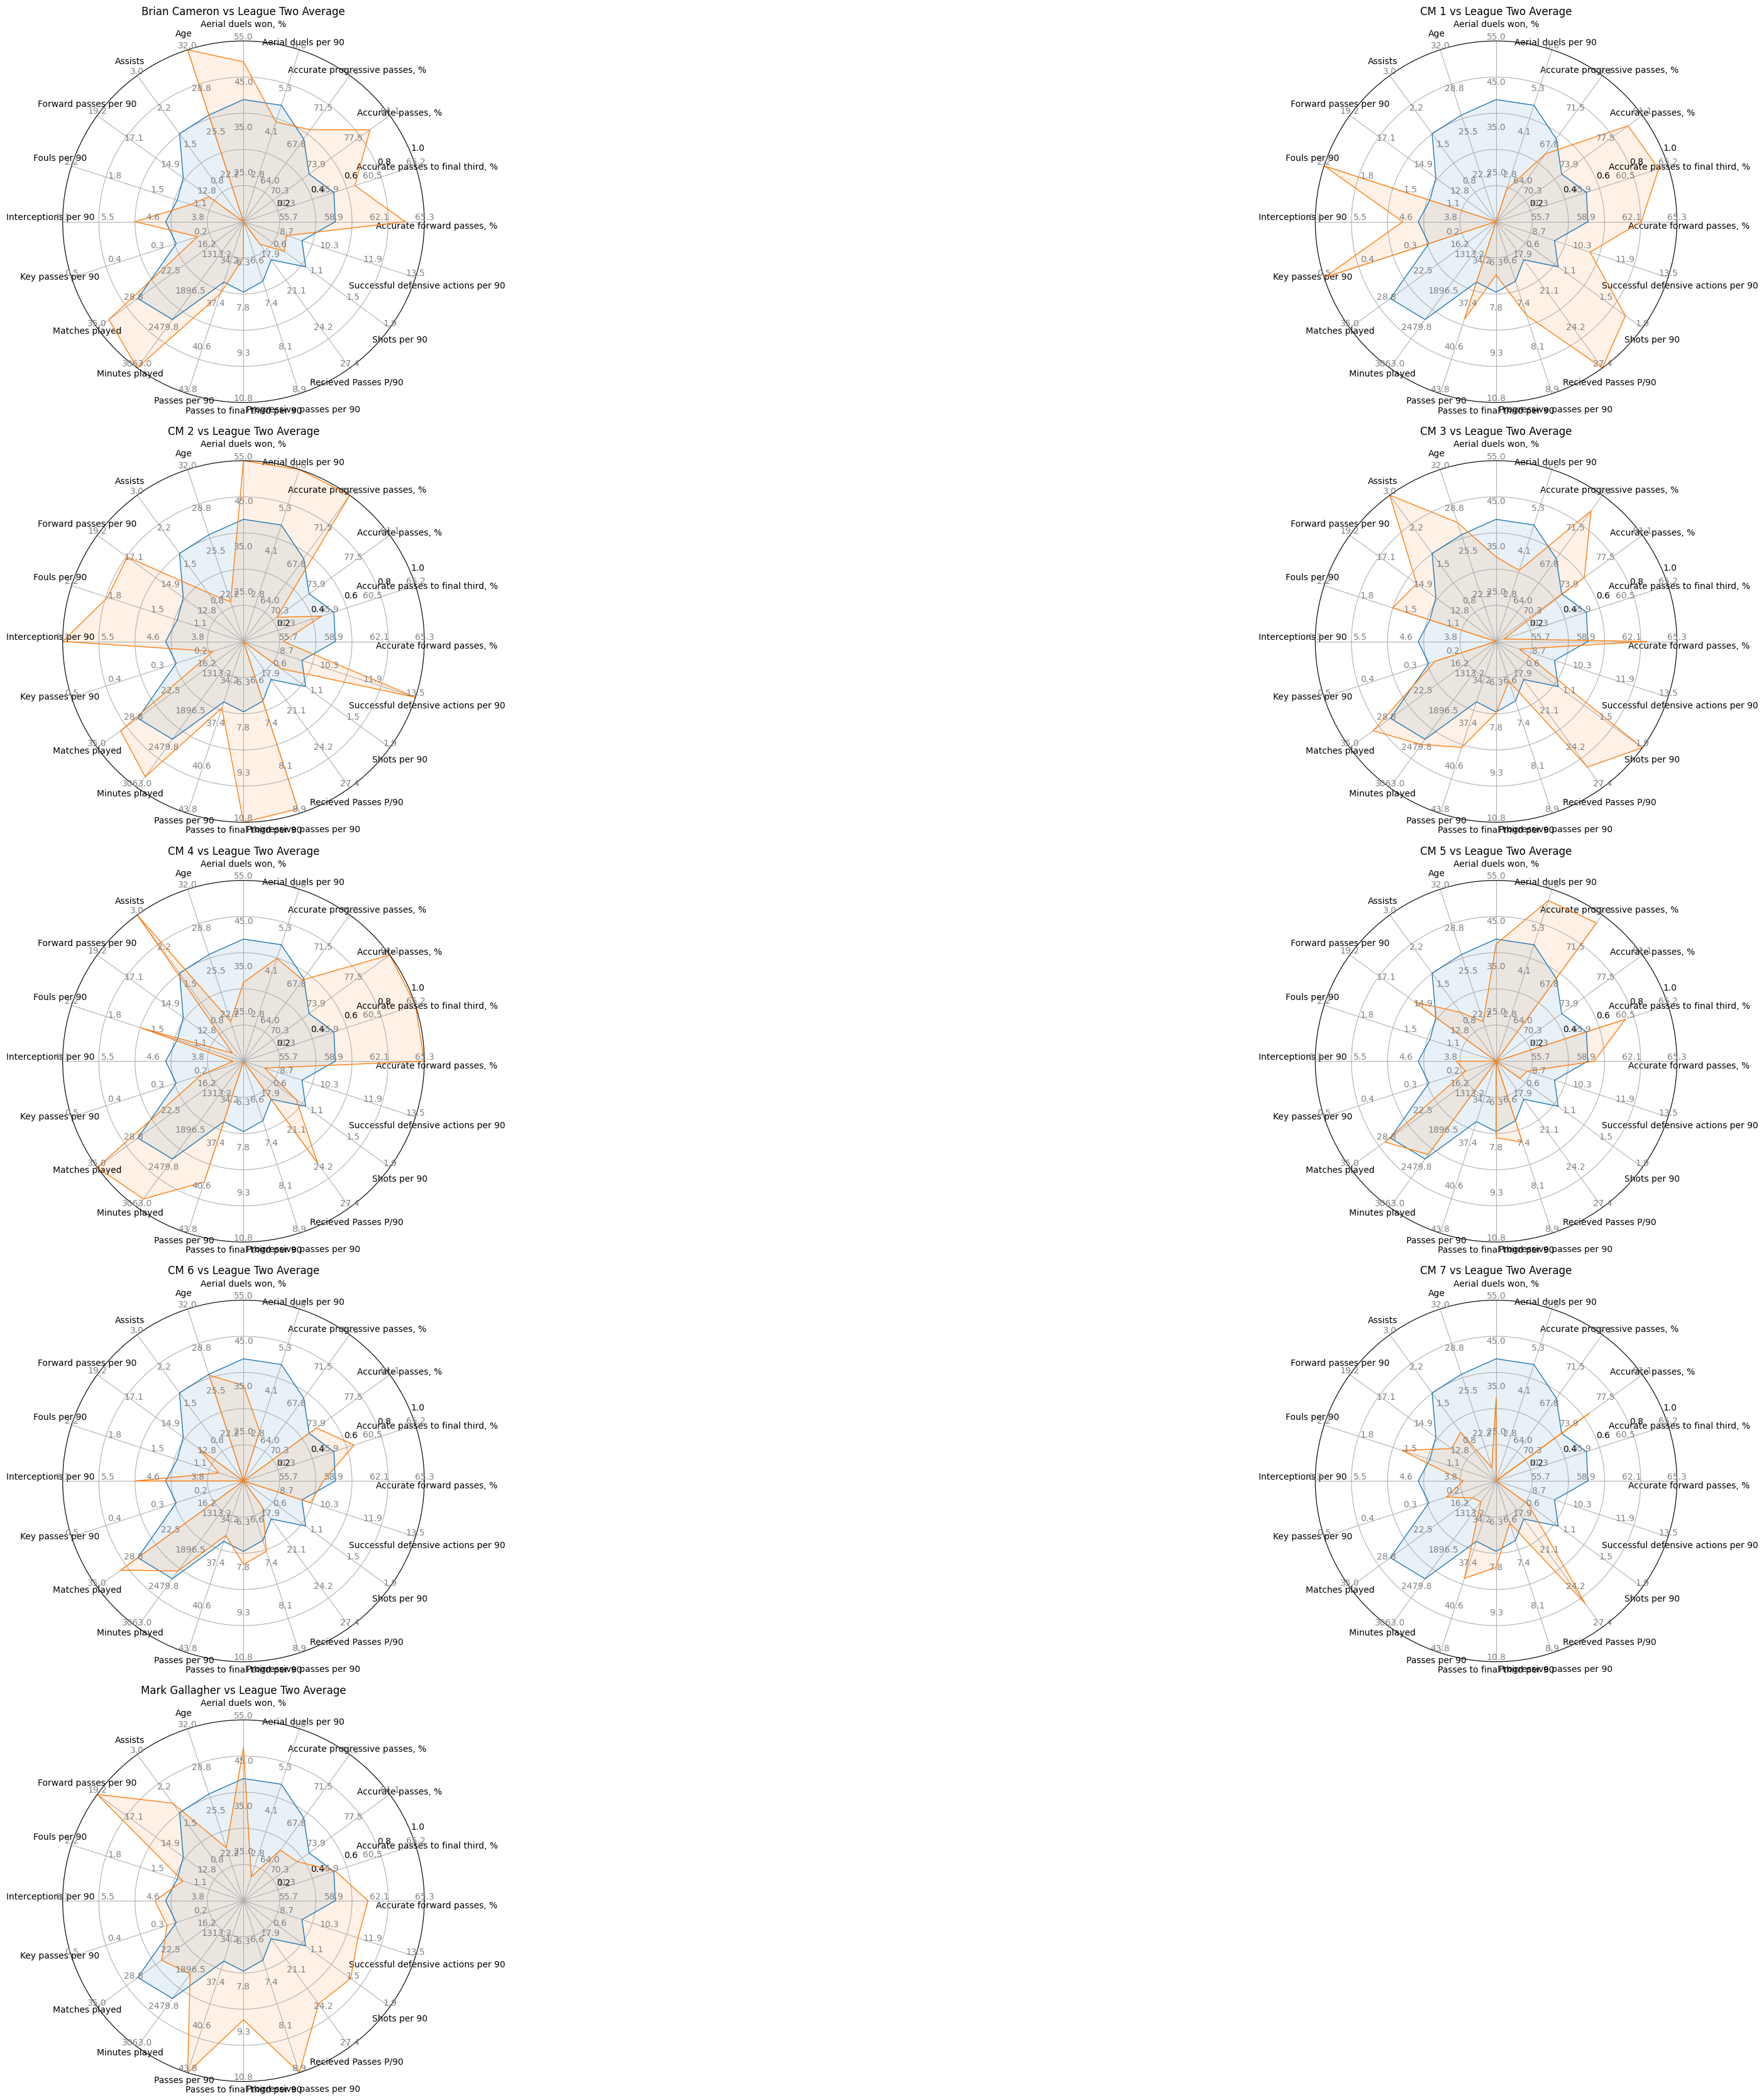

In [ ]:
fixed_player = "League Two Average"

# Get the list of players excluding the fixed player
players = [player for player in scaled_df.index if player != fixed_player]

# Set up the figure and axes for a 4x4 grid (or adjust based on the number of players)
num_rows = 6
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(40, 40), subplot_kw=dict(polar=True))
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Iterate over the players and create a radar chart for each
for idx, player in enumerate(players):
    ax = axs[idx]

    # Plot fixed player
    fixed_values = scaled_df.loc[fixed_player].tolist()
    fixed_values += fixed_values[:1]  # Complete the loop
    ax.plot(angles, fixed_values, linewidth=1, linestyle='solid', label=fixed_player)
    ax.fill(angles, fixed_values, alpha=0.1)

    # Plot current player
    player_values = scaled_df.loc[player].tolist()
    player_values += player_values[:1]  # Complete the loop
    ax.plot(angles, player_values, linewidth=1, linestyle='solid', label=player)
    ax.fill(angles, player_values, alpha=0.1)

    # Add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Rotate category labels based on angles
    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
      angle_deg = angle * 180/pi  # Convert radian to degree
      if angle_deg >= 90 and angle_deg <= 270:
         angle_deg += 180  # Flip the text for readability
         label.set_verticalalignment('bottom')
      else:
          label.set_verticalalignment('top')
      label.set_rotation(angle_deg)

    for i, category in enumerate(categories):
        angle_rad = angles[i]
        max_val = pivot_df[category].max()
        min_val = pivot_df[category].min()
        value_range = max_val - min_val
        for label in [0.25, 0.5, 0.75, 1.0]:
            value = label * value_range + min_val
            ax.text(angle_rad, label, f"{value:.1f}", ha='center', va='bottom', fontsize=10, color='gray')

    # Add a blank label at the center
    for angle in angles[:-1]:
        ax.text(angle, 0.0, "", ha='center', va='center', fontsize=10, color='gray')

    # Add custom y-axis labels
    # for i, category in enumerate(categories):
    #     angle_rad = angles[i]
    #     max_val = pivot_df[category].max()
    #     min_val = pivot_df[category].min()
    #     for label in [0.0, 0.25, 0.5, 0.75, 1.0]:
    #         value = label * (max_val - min_val) + min_val
    #         ax.text(angle_rad, label, f"{value:.1f}", ha='center', va='bottom', fontsize=10, color='gray')

    # Set y-limits
    ax.set_ylim(0, 1)

    # Title
    ax.set_title(f'{player} vs {fixed_player}')

# Hide any unused subplots
for i in range(len(players), num_rows * num_cols):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()

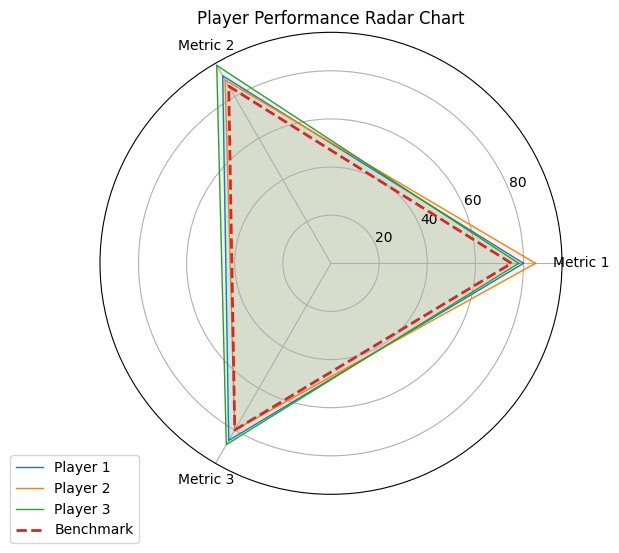

In [ ]:
# Sample data
categories = ['Metric 1', 'Metric 2', 'Metric 3']
players = {
    'Player 1': [80, 90, 85],
    'Player 2': [85, 88, 80],
    'Player 3': [78, 95, 87]
}
benchmark = [75, 85, 80]

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each player
for player, values in players.items():
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=player)
    ax.fill(angles, values, alpha=0.1)

# Plot benchmark
benchmark += benchmark[:1]
ax.plot(angles, benchmark, linewidth=2, linestyle='dashed', label='Benchmark')

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Player Performance Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()